In [179]:
import numpy as np
import pandas as pd
import datetime
import re

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import wordcloud

# Ejercicio 5
Para este ejercicio, generarás una Nube de Palabras, pero ahora con tuits de Bill Gates.

In [180]:
tweets  = pd.read_csv("https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/datos_tweets_@BillGates.csv")
tweets.head()

,screen_name,user_id,created_at,status_id,text,retweet_count,favorite_count,is_quote_status,quote_status_id,is_retweet,...,hashtags,coordinates,place_id,place_type,place_name,place_full_name,country_code,country,bounding_box_coordinates,bounding_box_type
0,BillGates,50393960,2017-11-09T20:09:06Z,9.287161e+17,Tanzania hopes to eliminate one of the world’s...,608,2483,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BillGates,50393960,2017-11-08T16:39:30Z,9.283010e+17,"By investing in R&amp;D, I know we can discove...",1090,5321,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BillGates,50393960,2017-11-07T17:43:05Z,9.279546e+17,This unusual tool for fighting disease turns o...,830,4653,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BillGates,50393960,2017-11-02T17:42:19Z,9.261424e+17,My first trip to Africa with Melinda was the c...,1421,10944,False,NaN,False,...,MyGivingStory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BillGates,50393960,2017-10-30T04:01:05Z,9.248486e+17,"“The death that didn’t happen is not visible.""...",918,3508,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se evaluará que:

1. Generes la limpieza del texto (puedes copiar los pasos que hicimos en la clase). (1 punto)
2. Utilices algún método extra para eliminar Stopwords. (1 punto)
Ideas (puedes usar una o varias):

    a) Eliminar manualmente palabras que no te digan mucho. Por ejemplo, "http".
    b) Usar STOPWORDS de la librería wordcloud.
    c) Usar stopwords de la librería nltk.

3. Generes tu gráfico de Nube de Palabras. (2 puntos)
4. Modifiques algun(os) parámetros para modificar tu Nube de Palabras (1 punto).

In [181]:
tweets.size

73045

1. Generes la limpieza del texto (puedes copiar los pasos que hicimos en la clase).

In [182]:
tweets = tweets[["status_id", "created_at", "text"]]
tweets.columns = ["ID", "Fecha", "Texto"]
tweets["Fecha"] = pd.to_datetime(tweets.Fecha)
tweets.head()

<ipython-input-182-42d17e1ea5ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["Fecha"] = pd.to_datetime(tweets.Fecha)


,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,Tanzania hopes to eliminate one of the world’s...
1,9.283010e+17,2017-11-08 16:39:30+00:00,"By investing in R&amp;D, I know we can discove..."
2,9.279546e+17,2017-11-07 17:43:05+00:00,This unusual tool for fighting disease turns o...
3,9.261424e+17,2017-11-02 17:42:19+00:00,My first trip to Africa with Melinda was the c...
4,9.248486e+17,2017-10-30 04:01:05+00:00,"“The death that didn’t happen is not visible.""..."


In [183]:
tweets["Texto"] = tweets["Texto"].str.lower()
tweets.head()

<ipython-input-183-78055bc27709>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets["Texto"] = tweets["Texto"].str.lower()


,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,tanzania hopes to eliminate one of the world’s...
1,9.283010e+17,2017-11-08 16:39:30+00:00,"by investing in r&amp;d, i know we can discove..."
2,9.279546e+17,2017-11-07 17:43:05+00:00,this unusual tool for fighting disease turns o...
3,9.261424e+17,2017-11-02 17:42:19+00:00,my first trip to africa with melinda was the c...
4,9.248486e+17,2017-10-30 04:01:05+00:00,"“the death that didn’t happen is not visible.""..."


In [184]:
codigo_regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'

tweets["Texto"] = tweets["Texto"].apply(lambda x: re.sub(codigo_regex, " ", x) )
tweets.head()

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,tanzania hopes to eliminate one of the world’s...
1,9.283010e+17,2017-11-08 16:39:30+00:00,by investing in r amp d i know we can discove...
2,9.279546e+17,2017-11-07 17:43:05+00:00,this unusual tool for fighting disease turns o...
3,9.261424e+17,2017-11-02 17:42:19+00:00,my first trip to africa with melinda was the c...
4,9.248486e+17,2017-10-30 04:01:05+00:00,“the death that didn’t happen is not visible ...


In [185]:
codigo_regex = '[0-9]'

tweets["Texto"] = tweets["Texto"].apply(lambda x: re.sub(codigo_regex, " ", x) )
tweets.head()

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,tanzania hopes to eliminate one of the world’s...
1,9.283010e+17,2017-11-08 16:39:30+00:00,by investing in r amp d i know we can discove...
2,9.279546e+17,2017-11-07 17:43:05+00:00,this unusual tool for fighting disease turns o...
3,9.261424e+17,2017-11-02 17:42:19+00:00,my first trip to africa with melinda was the c...
4,9.248486e+17,2017-10-30 04:01:05+00:00,“the death that didn’t happen is not visible ...


In [186]:
codigo_regex = '[\n\t]'
tweets["Texto"] = tweets["Texto"].apply(lambda x: re.sub(codigo_regex, "", x) )
tweets.head()

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,tanzania hopes to eliminate one of the world’s...
1,9.283010e+17,2017-11-08 16:39:30+00:00,by investing in r amp d i know we can discove...
2,9.279546e+17,2017-11-07 17:43:05+00:00,this unusual tool for fighting disease turns o...
3,9.261424e+17,2017-11-02 17:42:19+00:00,my first trip to africa with melinda was the c...
4,9.248486e+17,2017-10-30 04:01:05+00:00,“the death that didn’t happen is not visible ...


2. Utilices algún método extra para eliminar Stopwords. (1 punto)
Ideas (puedes usar una o varias):

    a) Eliminar manualmente palabras que no te digan mucho. Por ejemplo, "http".

In [187]:
#https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/
#tweets["Texto"] = tweets["Texto"].str.lower().str.split()
tweets["Texto"] = tweets["Texto"].replace({'http'}, regex=True)
tweets

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,tanzania hopes to eliminate one of the world’s...
1,9.283010e+17,2017-11-08 16:39:30+00:00,by investing in r amp d i know we can discove...
2,9.279546e+17,2017-11-07 17:43:05+00:00,this unusual tool for fighting disease turns o...
3,9.261424e+17,2017-11-02 17:42:19+00:00,my first trip to africa with melinda was the c...
4,9.248486e+17,2017-10-30 04:01:05+00:00,“the death that didn’t happen is not visible ...
...,...,...,...
2082,1.267828e+17,2011-10-19 22:12:21+00:00,malaria eradication is an ambitious long term...
2083,1.217460e+17,2011-10-06 00:38:09+00:00,for those of us lucky enough to get to work wi...
2084,1.217459e+17,2011-10-06 00:37:29+00:00,melinda and i extend our sincere condolences t...
2085,1.213001e+17,2011-10-04 19:06:05+00:00,the crisis in somalia has claimed child...


b) Usar STOPWORDS de la librería wordcloud. 

In [188]:
#import wordcloud #will use for the word cloud plot
#from wordcloud import WordCloud, STOPWORDS # optional to filter out the stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#wordcloud = WordCloud().generate(tweets)


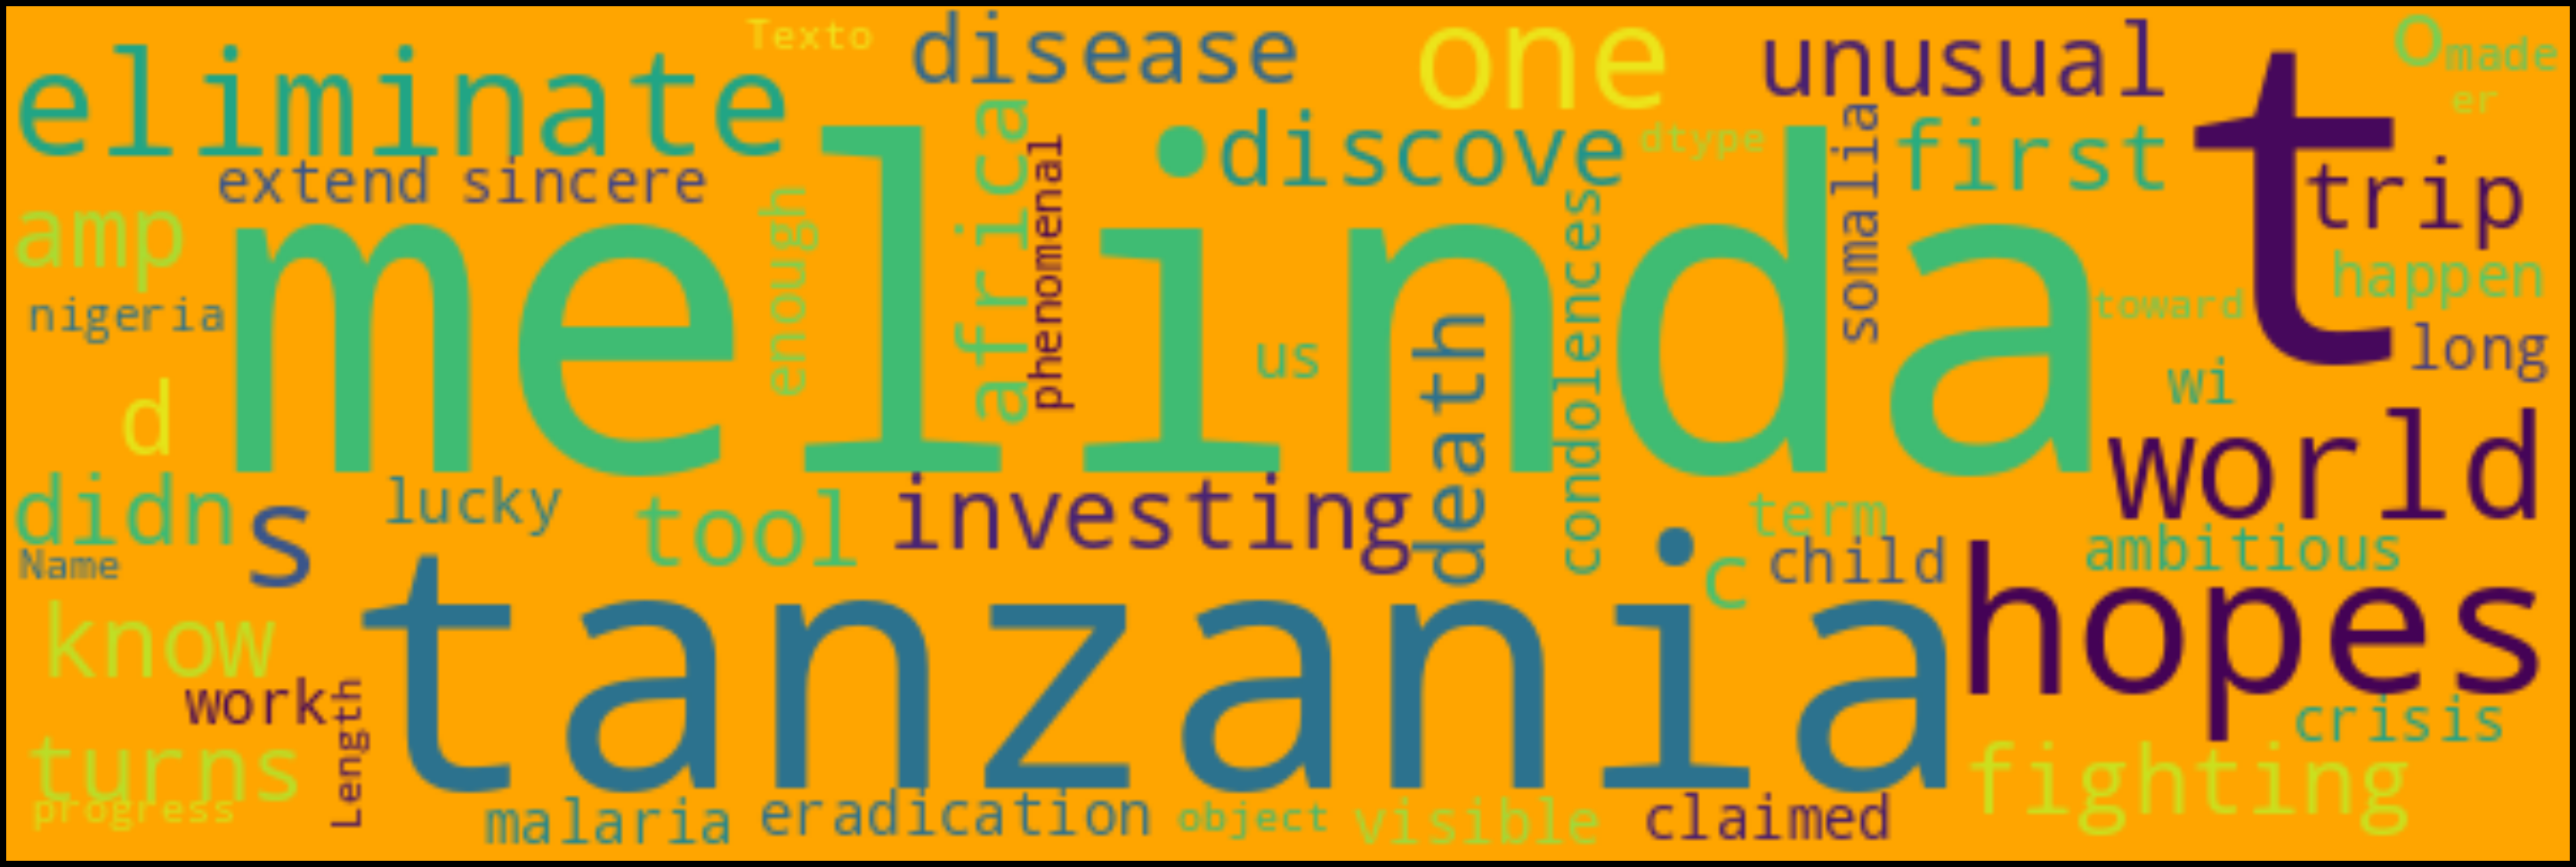

In [189]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 600,
    height = 200,
    background_color = 'orange').generate(str(tweets["Texto"])) 
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [190]:
tweets

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,tanzania hopes to eliminate one of the world’s...
1,9.283010e+17,2017-11-08 16:39:30+00:00,by investing in r amp d i know we can discove...
2,9.279546e+17,2017-11-07 17:43:05+00:00,this unusual tool for fighting disease turns o...
3,9.261424e+17,2017-11-02 17:42:19+00:00,my first trip to africa with melinda was the c...
4,9.248486e+17,2017-10-30 04:01:05+00:00,“the death that didn’t happen is not visible ...
...,...,...,...
2082,1.267828e+17,2011-10-19 22:12:21+00:00,malaria eradication is an ambitious long term...
2083,1.217460e+17,2011-10-06 00:38:09+00:00,for those of us lucky enough to get to work wi...
2084,1.217459e+17,2011-10-06 00:37:29+00:00,melinda and i extend our sincere condolences t...
2085,1.213001e+17,2011-10-04 19:06:05+00:00,the crisis in somalia has claimed child...


c) Usar stopwords de la librería nltk.

In [191]:
from nltk.corpus import stopwords
#tweets['tokenized'] = tweets.apply(lambda x: (x['Texto']), axis=1)
#tweets[['tokenized']].head()

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
tweets['Texto'] = tweets['Texto'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tweets.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,tanzania hopes eliminate one world’s painful d...
1,9.283010e+17,2017-11-08 16:39:30+00:00,investing r amp know discover new innovations ...
2,9.279546e+17,2017-11-07 17:43:05+00:00,unusual tool fighting disease turns old thinki...
3,9.261424e+17,2017-11-02 17:42:19+00:00,first trip africa melinda catalyst began mygiv...
4,9.248486e+17,2017-10-30 04:01:05+00:00,“the death didn’t happen visible fascinating c...


In [192]:
'''from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']'
stopwords.extend(my_stopwords)'''

'from nltk.corpus import stopwords\n\n# Make a list of english stopwords\nstopwords = nltk.corpus.stopwords.words("english")\n\n# Extend the list with your own custom stopwords\nmy_stopwords = [\'https\']\'\nstopwords.extend(my_stopwords)'

In [193]:
# Remove stopwords
#tweets['Texto'] = tweets['Texto'].apply(lambda x: [item for item in x if item not in stopwords])
#tweets.head()

In [194]:
tweets["Texto"] = tweets["Texto"].apply(lambda x: x.split(sep = ' ') )
tweets.head()

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,"[tanzania, hopes, eliminate, one, world’s, pai..."
1,9.283010e+17,2017-11-08 16:39:30+00:00,"[investing, r, amp, know, discover, new, innov..."
2,9.279546e+17,2017-11-07 17:43:05+00:00,"[unusual, tool, fighting, disease, turns, old,..."
3,9.261424e+17,2017-11-02 17:42:19+00:00,"[first, trip, africa, melinda, catalyst, began..."
4,9.248486e+17,2017-10-30 04:01:05+00:00,"[“the, death, didn’t, happen, visible, fascina..."


In [195]:
tweets["Texto"] = tweets["Texto"].apply(lambda x: [token for token in x if len(token) > 3] )
tweets.head()

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,"[tanzania, hopes, eliminate, world’s, painful,..."
1,9.283010e+17,2017-11-08 16:39:30+00:00,"[investing, know, discover, innovations, help,..."
2,9.279546e+17,2017-11-07 17:43:05+00:00,"[unusual, tool, fighting, disease, turns, thin..."
3,9.261424e+17,2017-11-02 17:42:19+00:00,"[first, trip, africa, melinda, catalyst, began..."
4,9.248486e+17,2017-10-30 04:01:05+00:00,"[“the, death, didn’t, happen, visible, fascina..."


In [196]:
def remove_word_from_list(word, lst):
    return [elem for elem in lst if elem != word]

tweets["Texto"] = tweets["Texto"].apply(lambda x: remove_word_from_list('https', x))
tweets.head()

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,"[tanzania, hopes, eliminate, world’s, painful,..."
1,9.283010e+17,2017-11-08 16:39:30+00:00,"[investing, know, discover, innovations, help,..."
2,9.279546e+17,2017-11-07 17:43:05+00:00,"[unusual, tool, fighting, disease, turns, thin..."
3,9.261424e+17,2017-11-02 17:42:19+00:00,"[first, trip, africa, melinda, catalyst, began..."
4,9.248486e+17,2017-10-30 04:01:05+00:00,"[“the, death, didn’t, happen, visible, fascina..."


3. Generes tu gráfico de Nube de Palabras. 

In [197]:
tweets_tidy = tweets.explode(column='Texto')
tweets_tidy

,ID,Fecha,Texto
0,9.287161e+17,2017-11-09 20:09:06+00:00,tanzania
0,9.287161e+17,2017-11-09 20:09:06+00:00,hopes
0,9.287161e+17,2017-11-09 20:09:06+00:00,eliminate
0,9.287161e+17,2017-11-09 20:09:06+00:00,world’s
0,9.287161e+17,2017-11-09 20:09:06+00:00,painful
...,...,...,...
2086,1.195196e+17,2011-09-29 21:11:15+00:00,local
2086,1.195196e+17,2011-09-29 21:11:15+00:00,efforts
2086,1.195196e+17,2011-09-29 21:11:15+00:00,finish
2086,1.195196e+17,2011-09-29 21:11:15+00:00,http


In [198]:
tweets_tidy.Texto.nunique()

7009

In [199]:
# Primero, unimos tooodos los strings
textos = " ".join(cat for cat in tweets_tidy.Texto)
textos

'tanzania hopes eliminate world’s painful diseases village i’m… gunyiiw investing know discover innovations help wipe tuberculosis dwrboyg unusual tool fighting disease turns thinking treatment head swmajhaoib first trip africa melinda catalyst began mygivingstory gyiuh “the death didn’t happen visible fascinating conversation atul gawande gladwell llprbyfc stories like remind melinda started foundation zoifrk johncena polio expert superstar’s many surprising talents pazm gvvrb privilege speaking greatcityschls continue address inequities public drduen correctly identify african countries you’ll surprised learn common cypj rbudk kids america great education left behind we’re help iyojoc maow maalin survived disease ever eradicated fought another…https cttkwq people learned bill foege cagam university remarkable students regardless race income graduate rate wggny bill foege’s vision greatest achievements global health eradication smallpox dpbrvoifjk approach philanthropy might look diff

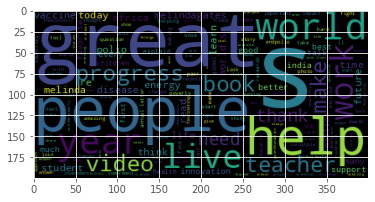

In [200]:
import wordcloud
word_cloud = wordcloud.WordCloud().generate(textos)

plt.imshow(word_cloud)
plt.show()

4. Modifiques algun(os) parámetros para modificar tu Nube de Palabras 

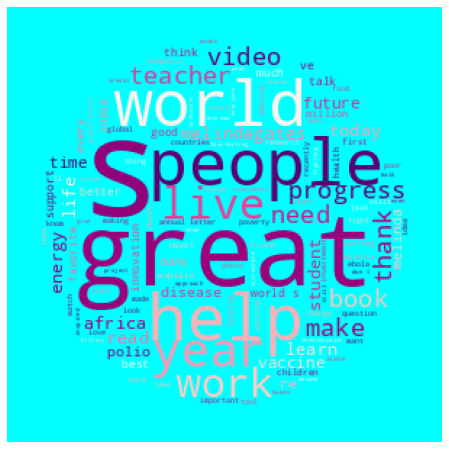

In [201]:
x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

word_cloud = wordcloud.WordCloud(background_color="cyan", colormap="RdPu", repeat=True, mask=mask).generate(textos)

plt.figure(figsize=[15,8])
plt.imshow(word_cloud)

# plt.axis("off") quita los ejes; en este caso, sólo estorban.
plt.axis("off")
plt.show()